In [2]:
import pandas as pd # version 2.0.2
import matplotlib.pyplot as plt # version 3.7.1
from datetime import datetime, timedelta
import numpy as np # version 1.23.5

# Data

In [3]:
df_1 = pd.read_feather("news1.arrow")
df_2 = pd.read_feather("news2.arrow")

In [4]:
df = pd.concat([df_1, df_2])
df.reset_index(inplace=True, drop=True)

In [5]:
df['Date'] = df['Date'].apply(lambda row : datetime.strptime(row, '%Y-%m-%d %H:%M:%S'))

In [6]:
df[df['Date'] >= '2023-06-01 00:00:00']\
.groupby("Company")\
.count()

,Author,Headline,Text,Date
Company,,,,
ALE,6,6,6,6
ALIOR-BANK,11,11,11,11
ASSECO-POLAND,3,3,3,3
CD-PROJEKT,23,23,23,23
CYFROWY-POLSAT,13,13,13,13
DNP,14,14,14,14
JSW-JASTRZEBSKA-SPOLKA-WEGLOWA,1,1,1,1
KETY,1,1,1,1
KGHM,6,6,6,6


In [7]:
df[df['Date'] < '2022-08-04 10:00:00']\
.groupby("Company")\
.count()

,Author,Headline,Text,Date
Company,,,,
ASSECO-POLAND,199,199,199,199
CYFROWY-POLSAT,16,16,16,16
DNP,33,33,33,33
JSW-JASTRZEBSKA-SPOLKA-WEGLOWA,29,29,29,29
KETY,178,178,178,178
KRUK,20,20,20,20
LPP,139,139,139,139
ORANGE,127,127,127,127
PCO,50,50,50,50


In [8]:
df.drop(df[df['Date'] >= '2023-06-01 00:00:00'].index, inplace = True)
df.drop(df[df['Date'] < '2022-08-04 10:00:00'].index, inplace = True)
df.reset_index(inplace=True, drop=True)

In [9]:
df['Text'] = df['Headline'] + " " + df['Text']
df.drop(['Headline'], axis=1, inplace = True)

In [10]:
df\
.groupby("Company")\
.count()

,Author,Text,Date
Company,,,
ALE,294,294,294
ALIOR-BANK,289,289,289
ASSECO-POLAND,98,98,98
CD-PROJEKT,277,277,277
CYFROWY-POLSAT,271,271,271
DNP,253,253,253
JSW-JASTRZEBSKA-SPOLKA-WEGLOWA,270,270,270
KETY,120,120,120
KGHM,294,294,294


In [11]:
df\
.groupby("Author")\
.count()

,Company,Text,Date
Author,,,
ISBiznes.pl,405,405,405
Infostrefa Akcjonariat,2,2,2
Infostrefa Analizy,4,4,4
Infostrefa Dywidendy,2,2,2
Infostrefa EBI,8,8,8
Infostrefa ESPI,650,650,650
Infostrefa Kadry,4,4,4
Infostrefa News,136,136,136
Infostrefa Rap Kwart,12,12,12


In [12]:
df

,Company,Author,Text,Date
0,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,50 zł dywidendy na akc...",2023-05-30 22:04:29
1,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (16/2023) Uchwały podjęte prz...,2023-05-30 20:43:31
2,ASSECO-POLAND,Puls Biznesu,Cztery nowe rekomendacje dla akcji spółek z WI...,2023-05-30 17:45:50
3,ASSECO-POLAND,ISBiznes.pl,Akcjonariusze Asseco Poland zdecydowali o wypł...,2023-05-30 16:34:18
4,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,5 zł dywidendy na akcj...",2023-05-30 14:22:22
...,...,...,...,...
4710,SPL,Infostrefa ESPI,AGORA SA (32/2022) Zawarcie Aneksu nr. 1 do um...,2022-08-26 19:31:17
4711,SPL,Infostrefa ESPI,ATLAS ESTATES LTD. (12/2022) Zawarcie aneksu d...,2022-08-24 15:10:01
4712,SPL,money.pl,Oto jak biedniejmy. Sytuacja najgorsza od 1995...,2022-08-10 15:12:42
4713,SPL,PAP Biznes,DZIEŃ NA FX/FI: Kurs EUR/PLN może pójść w górę...,2022-08-09 16:41:09


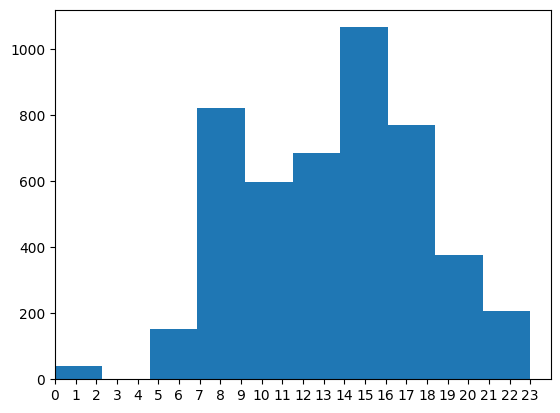

In [13]:
hour_list = [t.hour for t in df['Date']]
numbers = [x for x in range(0,24)]
labels = map(lambda x: str(x), numbers)

plt.xticks(numbers, labels)
plt.xlim(0, 24)
plt.hist(hour_list)

plt.show()

GPW run sessions between 9 and 17 so I will assume that news that appear between: 
- 17 t-1 untill 9 t will be disconted by return of t-1 close and t close,
- 9 t-1 untill 13 t will be disconted by return of apperance time and t close,
- 13 t-1 untill 17 t will be disconted by return of apperance time and t+1 close

In [14]:
def hour_round(t):
    hours_add = t.minute//30
    if t.hour == 23 and hours_add == 1:
        h = 0
    else:
        h = t.hour + hours_add
    return t.replace(second=0, microsecond=0, minute=0, hour=h)

In [15]:
df['Date'] = df['Date'].apply(lambda t: hour_round(t))

In [16]:
df

,Company,Author,Text,Date
0,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,50 zł dywidendy na akc...",2023-05-30 22:00:00
1,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (16/2023) Uchwały podjęte prz...,2023-05-30 21:00:00
2,ASSECO-POLAND,Puls Biznesu,Cztery nowe rekomendacje dla akcji spółek z WI...,2023-05-30 18:00:00
3,ASSECO-POLAND,ISBiznes.pl,Akcjonariusze Asseco Poland zdecydowali o wypł...,2023-05-30 17:00:00
4,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,5 zł dywidendy na akcj...",2023-05-30 14:00:00
...,...,...,...,...
4710,SPL,Infostrefa ESPI,AGORA SA (32/2022) Zawarcie Aneksu nr. 1 do um...,2022-08-26 20:00:00
4711,SPL,Infostrefa ESPI,ATLAS ESTATES LTD. (12/2022) Zawarcie aneksu d...,2022-08-24 15:00:00
4712,SPL,money.pl,Oto jak biedniejmy. Sytuacja najgorsza od 1995...,2022-08-10 15:00:00
4713,SPL,PAP Biznes,DZIEŃ NA FX/FI: Kurs EUR/PLN może pójść w górę...,2022-08-09 17:00:00


# Returns

In [17]:
names_map = {"ASSECO-POLAND":"ACP", 
             "ALE":"ALE", 
             "ALIOR-BANK":"ALR", 
             "CD-PROJEKT":"CDR", 
             "CYFROWY-POLSAT":"CPS",
             "DNP":"DNP", 
             "JSW-JASTRZEBSKA-SPOLKA-WEGLOWA":"JSW", 
             "KGHM":"KGH", 
             "KRUK":"KRU", 
             "KETY":"KTY", 
             "LPP":"LPP", 
             "MBANK":"MBK", 
             "ORANGE":"OPL", 
             "PCO":"PCO",
             "PEKAO":"PEO",
             "PGE":"PGE", 
             "PKN-ORLEN":"PKN", 
             "PKO":"PKO", 
             "PZU":"PZU", 
             "SPL":"SPL"}

In [18]:
stock = []
for i in names_map.values():
    with open(f'quotes\{i.lower()}.txt') as f:
        next(f)
        stock.append(f.readlines())
        
flat_list = [item for sublist in stock for item in sublist]
stock_list = [list.split(',') for list in flat_list]
df_stock = pd.DataFrame(stock_list, 
                        columns=['<TICKER>','<PER>','<DATE>','<TIME>','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>','<OPENINT>'])

In [19]:
df_stock

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,ACP,60,20220804,100000,71.45,71.85,71.45,71.6,1387,0\n
1,ACP,60,20220804,110000,71.6,71.65,71.25,71.35,2571,0\n
2,ACP,60,20220804,120000,71.35,71.35,71,71.15,1682,0\n
3,ACP,60,20220804,130000,71.25,71.8,71.25,71.5,2843,0\n
4,ACP,60,20220804,140000,71.5,71.8,71.5,71.55,3188,0\n
...,...,...,...,...,...,...,...,...,...,...
32954,SPL,60,20230531,130000,339,339.8,337.6,338.4,5497,0\n
32955,SPL,60,20230531,140000,338.4,340.6,338,338.2,6169,0\n
32956,SPL,60,20230531,150000,338,338,336.4,337.4,5111,0\n
32957,SPL,60,20230531,160000,338,339.6,337.8,338.4,13256,0\n


In [20]:
df_stock['<DATE>'] = pd.to_datetime(df_stock['<DATE>'] + ' ' + df_stock['<TIME>'])
df_stock.drop(['<TIME>'], axis=1, inplace=True)

In [21]:
df_stock

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,ACP,60,2022-08-04 10:00:00,71.45,71.85,71.45,71.6,1387,0\n
1,ACP,60,2022-08-04 11:00:00,71.6,71.65,71.25,71.35,2571,0\n
2,ACP,60,2022-08-04 12:00:00,71.35,71.35,71,71.15,1682,0\n
3,ACP,60,2022-08-04 13:00:00,71.25,71.8,71.25,71.5,2843,0\n
4,ACP,60,2022-08-04 14:00:00,71.5,71.8,71.5,71.55,3188,0\n
...,...,...,...,...,...,...,...,...,...
32954,SPL,60,2023-05-31 13:00:00,339,339.8,337.6,338.4,5497,0\n
32955,SPL,60,2023-05-31 14:00:00,338.4,340.6,338,338.2,6169,0\n
32956,SPL,60,2023-05-31 15:00:00,338,338,336.4,337.4,5111,0\n
32957,SPL,60,2023-05-31 16:00:00,338,339.6,337.8,338.4,13256,0\n


In [22]:
# iterating through each company
for c in names_map.items():
    cmp, tick = c
    # filtering the company from df
    df_cmp = df[df['Company'] == cmp]
    # iterating through each date / row
    for t in df_cmp['Date']:
        # Saturday
        if t.weekday() == 5:
            start = t.replace(hour=17) - timedelta(days=1)
            end = t.replace(hour=17) + timedelta(days=2)
        # Sunday
        elif t.weekday() == 6:
            start = t.replace(hour=17) - timedelta(days=2)
            end = t.replace(hour=17) + timedelta(days=1)
        # news that came past 17:00
        elif t.hour > 17:
            start = t.replace(hour=17)
            # Friday past 17:00
            if t.weekday() == 4:
                end = t.replace(hour=17) + timedelta(days=3)
            else:
                end = t.replace(hour=17) + timedelta(days=1)
        # news that came before 10:00
        elif t.hour < 10:
            # Monday before 10:00
            if t.weekday() == 0:
                start = t.replace(hour=17) - timedelta(days=3)
            else:
                start = t.replace(hour=17) - timedelta(days=1)
            end = t.replace(hour=17)
        else:
            start = t
            # news that came before 14:00
            if start.hour < 14:
                end = t.replace(hour=17)
            else:
                # Friday past 14:00
                if t.weekday() == 4:
                    end = t.replace(hour=17) + timedelta(days=3)
                else:
                    end = t.replace(hour=17) + timedelta(days=1)

        base_price = df_stock[(df_stock['<DATE>'] == start) & (df_stock['<TICKER>'] == tick)]['<CLOSE>']
        new_price = df_stock[(df_stock['<DATE>'] == end) & (df_stock['<TICKER>'] == tick)]['<CLOSE>']
            
        if (base_price.values.size != 0) & (new_price.values.size != 0):
            df.loc[(df['Date'] == t) & (df['Company'] == cmp), 'Return'] = ((float(new_price.values[0]) - float(base_price.values[0]))/float(base_price.values[0]))*100
        else:
            df.loc[(df['Date'] == t) & (df['Company'] == cmp), 'Return'] = 'NA'

In [23]:
df

,Company,Author,Text,Date,Return
0,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,50 zł dywidendy na akc...",2023-05-30 22:00:00,0.060753
1,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (16/2023) Uchwały podjęte prz...,2023-05-30 21:00:00,0.060753
2,ASSECO-POLAND,Puls Biznesu,Cztery nowe rekomendacje dla akcji spółek z WI...,2023-05-30 18:00:00,0.060753
3,ASSECO-POLAND,ISBiznes.pl,Akcjonariusze Asseco Poland zdecydowali o wypł...,2023-05-30 17:00:00,0.060753
4,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,5 zł dywidendy na akcj...",2023-05-30 14:00:00,-0.302663
...,...,...,...,...,...
4710,SPL,Infostrefa ESPI,AGORA SA (32/2022) Zawarcie Aneksu nr. 1 do um...,2022-08-26 20:00:00,-3.251318
4711,SPL,Infostrefa ESPI,ATLAS ESTATES LTD. (12/2022) Zawarcie aneksu d...,2022-08-24 15:00:00,1.304348
4712,SPL,money.pl,Oto jak biedniejmy. Sytuacja najgorsza od 1995...,2022-08-10 15:00:00,2.808511
4713,SPL,PAP Biznes,DZIEŃ NA FX/FI: Kurs EUR/PLN może pójść w górę...,2022-08-09 17:00:00,0.937766


In [24]:
df[df['Return'] == 'NA']

,Company,Author,Text,Date,Return
25,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (11/2023) Uzupełnienie dokume...,2023-05-02 20:00:00,NA
26,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (10/2023) Zwołanie Zwyczajneg...,2023-05-02 14:00:00,NA
57,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (1/2023) Zawiadomienie o zmia...,2023-01-05 16:00:00,NA
98,ALE,PAP Biznes,DZIEŃ NA GPW: Indeksy od początku sesji notują...,2023-05-31 17:00:00,NA
99,ALE,portalspozywczy.pl,Nowa konkurencja dla Allegro rusza 29 czerwca....,2023-05-31 14:00:00,NA
...,...,...,...,...,...
4465,SPL,Infostrefa ESPI,BEST SA (19/2023) Zawarcie umowy kredytu z San...,2023-05-31 15:00:00,NA
4504,SPL,Puls Biznesu,Santander Bank Polska: odbieramy przekaz preze...,2023-04-06 19:00:00,NA
4613,SPL,Puls Biznesu,"Gajewski: Kiedy dzieje się źle, kiedyś wynikni...",2022-12-27 01:00:00,NA
4614,SPL,Infostrefa ESPI,AGORA SA (44/2022) Zawarcie aneksu do umowy o ...,2022-12-23 19:00:00,NA


In [25]:
df.drop(df[df['Return'] == 'NA'].index, inplace = True)
df.reset_index(inplace=True, drop=True)

# Model

In [26]:
from sklearn.model_selection import train_test_split # version 1.2.2
from keras.preprocessing.text import Tokenizer # version 2.12.0
from keras_preprocessing.sequence import pad_sequences # version 1.1.2
from sklearn.preprocessing import MinMaxScaler, StandardScaler # version 1.2.2
import re

In [27]:
EPOCHS = 40
BATCH_SIZE = 16

In [28]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a reression model. The number of epochs and 
    batch_size are set above. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='adam'
                  , loss='mse'
                  , metrics=['mse'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

In [72]:
scaler = MinMaxScaler(copy=False, feature_range=(-1, 1))
df['Target'] = scaler.fit_transform(df[['Return']])

In [73]:
scaler = StandardScaler(copy=False)
df['Target'] = scaler.fit_transform(df[['Target']])

In [29]:
df['Target'] = (df['Return'] - df['Return'].mean()) / (df['Return'].std(ddof=0)*2)

In [30]:
df

,Company,Author,Text,Date,Return,Target
0,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,50 zł dywidendy na akc...",2023-05-30 22:00:00,0.060753,0.007162
1,ASSECO-POLAND,Infostrefa ESPI,ASSECO POLAND SA (16/2023) Uchwały podjęte prz...,2023-05-30 21:00:00,0.060753,0.007162
2,ASSECO-POLAND,Puls Biznesu,Cztery nowe rekomendacje dla akcji spółek z WI...,2023-05-30 18:00:00,0.060753,0.007162
3,ASSECO-POLAND,ISBiznes.pl,Akcjonariusze Asseco Poland zdecydowali o wypł...,2023-05-30 17:00:00,0.060753,0.007162
4,ASSECO-POLAND,PAP Biznes,"Asseco Poland wypłaci 3,5 zł dywidendy na akcj...",2023-05-30 14:00:00,-0.302663,-0.059289
...,...,...,...,...,...,...
4533,SPL,Infostrefa ESPI,AGORA SA (32/2022) Zawarcie Aneksu nr. 1 do um...,2022-08-26 20:00:00,-3.251318,-0.598448
4534,SPL,Infostrefa ESPI,ATLAS ESTATES LTD. (12/2022) Zawarcie aneksu d...,2022-08-24 15:00:00,1.304348,0.234552
4535,SPL,money.pl,Oto jak biedniejmy. Sytuacja najgorsza od 1995...,2022-08-10 15:00:00,2.808511,0.509588
4536,SPL,PAP Biznes,DZIEŃ NA FX/FI: Kurs EUR/PLN może pójść w górę...,2022-08-09 17:00:00,0.937766,0.167523


(array([  16.,   99.,  715., 2409., 1129.,  112.,   17.,    8.,    8.,
          25.]),
 array([-2.00041204, -1.45335177, -0.9062915 , -0.35923123,  0.18782904,
         0.73488931,  1.28194957,  1.82900984,  2.37607011,  2.92313038,
         3.47019065]),
 <BarContainer object of 10 artists>)

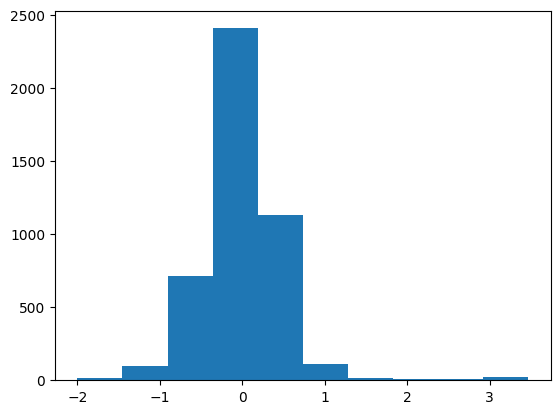

In [31]:
plt.hist(df['Target'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], test_size=0.1, random_state=37)

In [33]:
X_train

2144    GPW: w sprawie dopuszczenia do obrotu giełdowe...
2317    Grupa Kęty miała wstępnie 65 mln zł zysku nett...
3635    Zarząd PKN Orlen zwołał ZWZ na 21 czerwca; pro...
2385    Producent Reserved i Sinsay przebił miliard zy...
1075    Erste rekomenduje "akumuluj" Cyfrowy Polsat Er...
                              ...                        
4533    AGORA SA (32/2022) Zawarcie Aneksu nr. 1 do um...
988     Cyfrowy Polsat wypłaci rekompensaty konsumento...
844     BM mBanku podniosło ceny docelowe 11 bit studi...
4459    Złoty osłabł względem głównych walut         W...
1935    Analityk jest rozczarowany KGHM Analityk jest ...
Name: Text, Length: 4084, dtype: object

In [34]:
tk = Tokenizer(num_words=10000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [35]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    4084.000000
mean       50.692948
std        36.247317
min         7.000000
25%        35.000000
50%        49.500000
75%        64.000000
max      1023.000000
Name: Text, dtype: float64

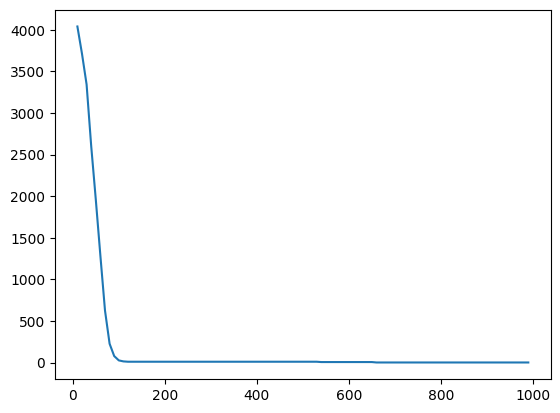

In [36]:
x_len = range(10, 1000, 10)
y_len = []
for i in x_len:
    y_len.append(seq_lengths[seq_lengths>i].count())
plt.plot(x_len, y_len)

(array([354., 335., 792., 753., 782., 637., 298., 101.,  16.,   6.]),
 array([  7. ,  18.3,  29.6,  40.9,  52.2,  63.5,  74.8,  86.1,  97.4,
        108.7, 120. ]),
 <BarContainer object of 10 artists>)

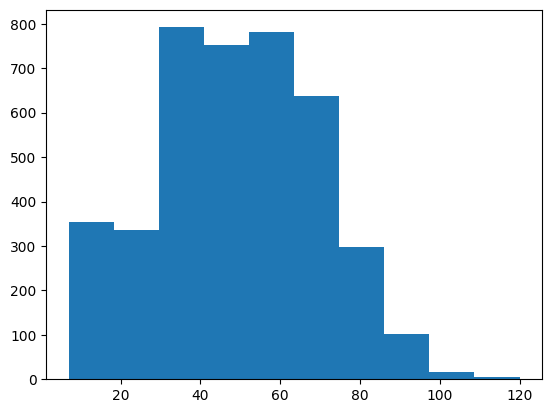

In [37]:
plt.hist(seq_lengths[seq_lengths<200])

In [38]:
counter = 0
for x in X_train:
    if len(x.split(" ")) > 120:
        print(x)
        print("------------------------------")
        counter +=1
print(counter)

Duże spółki idą za ciosem. Spektakularna przecena Bumechu           Początek tygodnia rozpoczął się od przewagi wzrostów w indeksienajwiększych spółek i nieco gorszej postawy niższych segmentów rynku. Pozytywniewyróżniły się spółki ukraińskie oraz banki, ale spektakularnej przecenydoświadczył kurs węglowego Bumechu.  Sesja rozpoczęła się od kontynuacji wzrostów rozpoczętychpod koniec ubiegłego tygodnia. Paliwa, poprawiającego poranny sentyment dodałyinformacje z frontu o ofensywie ukraińskiej armii. Wsparciembyło także dalsze osłabianie się dolara względem euro, z czego wydatniekorzystał złoty i kupujący na GPW. Im bliżej było otwarcia sesji na WallStreet, tym lepiej radziły sobie indeksy w Europie, w tym WIG20. Przyspieszeniepopytu nastąpiło, po zdecydowanie wzrostowym początku handlu w USA.  Inwestorzy pozycjonują się przed wtorkowymodczytem amerykańskiej inflacji, sądząc że pokaże jej dalsze hamowanie.  Na koniec dnia WIG20 zyskał 1,78 proc. WIG był wyżej 0 1,18proc. Relatywnie słab

In [39]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=100)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=100)

In [40]:
embeddings = {}
with open("pl-embeddings-skip.txt", mode='rt', encoding="utf8") as f:
    embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float32') for l in f}

In [41]:
embeddings['dywidenda']

array([-0.266536,  0.040312,  0.875124, -0.798659,  0.867121,  0.931002,
       -0.284104, -1.112939, -0.47954 ,  0.511097, -0.322948,  0.485137,
        1.25858 ,  0.881049,  0.102876,  0.722581, -0.39343 , -0.129943,
       -0.447877, -0.389228,  0.448516, -0.708302,  1.403812, -0.516813,
       -0.488191,  0.226744, -0.535846, -0.718151,  0.484075,  0.066418,
       -0.861163, -0.127869,  0.017477,  0.174832, -0.539064,  0.394054,
       -0.2974  , -0.78211 ,  0.311912, -0.063425,  0.638258, -0.825092,
       -0.268071, -0.499609, -0.222198,  0.149423, -0.142879,  0.317079,
        0.974509, -0.126922, -0.630879,  0.462824,  0.029691,  0.36385 ,
        0.567186, -0.423124, -0.788354, -0.550667, -0.200888, -0.440256,
        1.290893,  0.295323, -0.774936,  0.568726,  0.370841,  0.648313,
        1.588679,  0.107853,  0.731486,  0.836317, -0.186761, -0.486988,
       -1.092643,  0.151492, -0.868233, -0.122659,  0.399578, -0.124089,
        0.995891,  0.941002, -0.200161, -0.581556, 

In [42]:
from keras import models # version 2.12.0
from keras import layers

In [43]:
emb_matrix = np.zeros((10000, 100))

for w, i in tk.word_index.items():
    # The word_index contains a token for all words of the training data so we need to limit that
    if i < 10000:
        vect = embeddings.get(w)
        # Check if the word from the training data occurs in the embeddings set
        # Otherwise the vector is kept with only zeros
        if vect is not None:
            emb_matrix[i] = vect
    else:
        break

In [44]:
model = models.Sequential()
model.add(layers.Embedding(10000, 100, input_length = 100))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(64))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.8))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='tanh'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 batch_normalization (BatchN  (None, 100, 100)         400       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [45]:
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 batch_normalization (BatchN  (None, 100, 100)         400       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [46]:
X_train_seq_trunc = np.asarray(X_train_seq_trunc).astype('float32')
X_test_seq_trunc = np.asarray(X_test_seq_trunc).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [47]:
model_history = deep_model(model, X_train_seq_trunc, y_train, X_test_seq_trunc, y_test)

Epoch 1/40
256/256 [==============================] - 10s 30ms/step - loss: 0.6180 - mse: 0.6180 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 2/40
256/256 [==============================] - 6s 24ms/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.2397 - val_mse: 0.2397
Epoch 3/40
256/256 [==============================] - 6s 24ms/step - loss: 0.3077 - mse: 0.3077 - val_loss: 0.2401 - val_mse: 0.2401
Epoch 4/40
256/256 [==============================] - 6s 23ms/step - loss: 0.2870 - mse: 0.2870 - val_loss: 0.2339 - val_mse: 0.2339
Epoch 5/40
256/256 [==============================] - 6s 24ms/step - loss: 0.2733 - mse: 0.2733 - val_loss: 0.2358 - val_mse: 0.2358
Epoch 6/40
256/256 [==============================] - 6s 25ms/step - loss: 0.2726 - mse: 0.2726 - val_loss: 0.2339 - val_mse: 0.2339
Epoch 7/40
256/256 [==============================] - 6s 23ms/step - loss: 0.2659 - mse: 0.2659 - val_loss: 0.2328 - val_mse: 0.2328
Epoch 8/40
256/256 [==============================] - 6s 23ms/step -

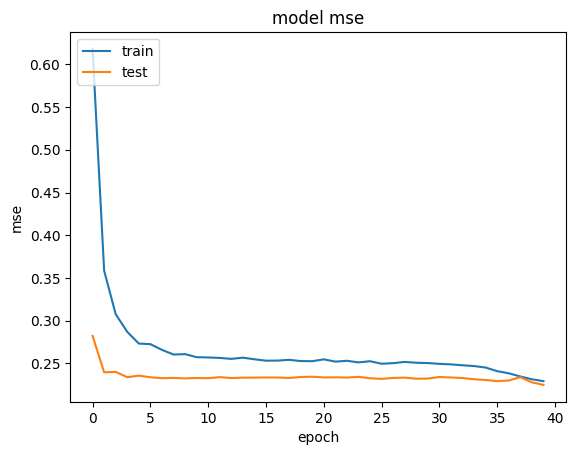

In [48]:
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred = model.predict(X_train_seq_trunc)

128/128 [==============================] - 2s 12ms/step


In [50]:
y_pred = [y for sublist in np.transpose(y_pred) for y in sublist]

In [51]:
print(max(y_pred))
print(min(y_pred))

0.46838698
-0.32294452


In [52]:
y_train

array([-0.1338114 , -0.43587437,  0.6389628 , ...,  0.06498791,
       -0.30369982, -0.04209605], dtype=float32)

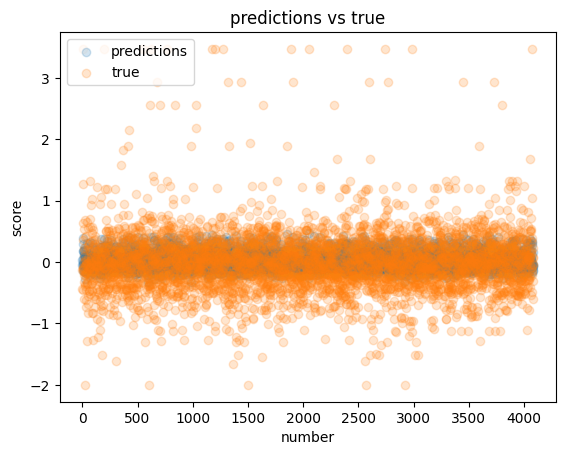

In [53]:
plt.scatter(range(len(y_pred)), y_pred, alpha=.2)
plt.scatter(range(len(y_pred)), y_train, alpha=.2)
plt.title('predictions vs true')
plt.ylabel('score')
plt.xlabel('number')
plt.legend(['predictions', 'true'], loc='upper left')
plt.show()

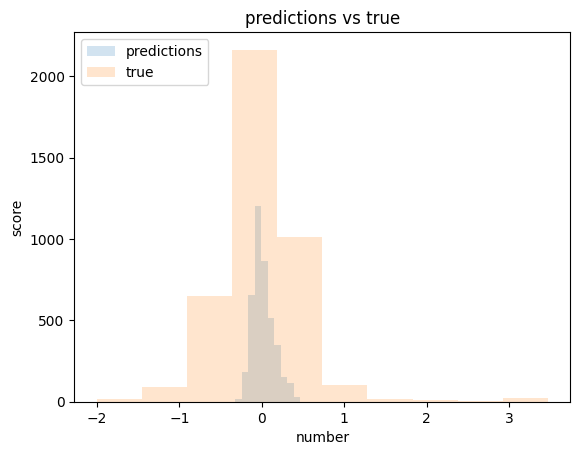

In [54]:
plt.hist(y_pred, alpha=.2)
plt.hist(y_train, alpha=.2)
plt.title('predictions vs true')
plt.ylabel('score')
plt.xlabel('number')
plt.legend(['predictions', 'true'], loc='upper left')
plt.show()

In [55]:
from joblib import Parallel, delayed # version 1.2.0
import joblib

In [56]:
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [57]:
joblib.dump(tk, 'tokenizer.joblib')

['tokenizer.joblib']

# Some Tests

In [121]:
def model_actualization(score, article):
    model_input = article_preprocessing(article)
    target = np.asarray(int(score)/100).astype('float32')
    model.fit(model_input, np.array([target]), epochs=100, verbose=0)

In [114]:
def article_preprocessing(article):
#     print(article)
    concat = article["Headline"] + " " + article["Text"]
#     print(concat)
    tokenized = tk.texts_to_sequences(concat)
#     print(tokenized)
    padded = pad_sequences(tokenized, maxlen=60)
#     print(padded)
    model_input = np.asarray(padded).astype('float32')
    return model_input

In [115]:
def score_calculate(article):
    model_input = article_preprocessing(article)
#     print(model_input)
    score = model.predict(model_input) * 100
    return score

In [124]:
article = pd.DataFrame({"Headline":["LPP: W Rumunii zainwestujemy w logistykę LPP: W Rumunii zainwestujemy w logistykę"], 
                        "Text":["Bogacący się konsumenci, dobra infrastruktura i położenie, poprawiające się regulacje — to rumuńskie atuty według Przemysława Lutkiewicza, wiceprezesa LPP."]})
print(score_calculate(article))

1/1 [==============================] - 0s 47ms/step
[[85.07834]]


In [123]:
score = 100
model_actualization(score, article)